<a href="https://colab.research.google.com/github/student-Nit/CP-progress-Tracker/blob/main/CP_progress_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas requests scikit-learn matplotlib joblib


In [ ]:
import requests, pandas as pd

handle = input("Enter your Codeforces handle: ")

# Check if the input is a URL and extract the handle
if "codeforces.com/profile/" in handle:
    handle = handle.split("/")[-1]

url = f"https://codeforces.com/api/user.rating?handle={handle}"
data = requests.get(url).json()

if data["status"] != "OK":
    # If the API returns a specific comment, use that in the exception
    if "comment" in data:
        raise Exception(f"Invalid Codeforces Handle: {data['comment']}")
    else:
        raise Exception("Invalid Codeforces Handle")

df = pd.DataFrame(data["result"])
df.to_csv("ratings.csv", index=False)
df.head()

Enter your Codeforces handle: https://codeforces.com/profile/rrt_45


,contestId,contestName,handle,rank,ratingUpdateTimeSeconds,oldRating,newRating
0,1955,Codeforces Round 938 (Div. 3),rrt_45,10616,1712595000,0,432
1,1954,Educational Codeforces Round 164 (Rated for Di...,rrt_45,11232,1712939700,432,697
2,1974,Codeforces Round 946 (Div. 3),rrt_45,13196,1716223800,697,920
3,1981,Codeforces Round 949 (Div. 2),rrt_45,6079,1717157100,920,1047
4,1980,Codeforces Round 950 (Div. 3),rrt_45,13455,1717433400,1047,1103


In [4]:
df = pd.read_csv("ratings.csv")
df["contest_number"] = range(1, len(df)+1)
df["rating_change"] = df["newRating"] - df["oldRating"]
df.to_csv("features.csv", index=False)
df.head()

,contestId,contestName,handle,rank,ratingUpdateTimeSeconds,oldRating,newRating,contest_number,rating_change
0,1955,Codeforces Round 938 (Div. 3),rrt_45,10616,1712595000,0,432,1,432
1,1954,Educational Codeforces Round 164 (Rated for Di...,rrt_45,11232,1712939700,432,697,2,265
2,1974,Codeforces Round 946 (Div. 3),rrt_45,13196,1716223800,697,920,3,223
3,1981,Codeforces Round 949 (Div. 2),rrt_45,6079,1717157100,920,1047,4,127
4,1980,Codeforces Round 950 (Div. 3),rrt_45,13455,1717433400,1047,1103,5,56


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib

df = pd.read_csv("features.csv")

X = df[["contest_number", "rank"]]
y = df["newRating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

joblib.dump(model, "rating_model.pkl")
print("Model trained successfully!")


Model trained successfully!


In [6]:
import joblib

model = joblib.load("rating_model.pkl")

contest_num = int(input("Enter upcoming contest number: "))
rank = int(input("Enter expected rank: "))

pred = model.predict([[contest_num, rank]])
print("📈 Predicted Next Rating:", int(pred[0]))


Enter upcoming contest number: 20
Enter expected rank: 2000
📈 Predicted Next Rating: 1254


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


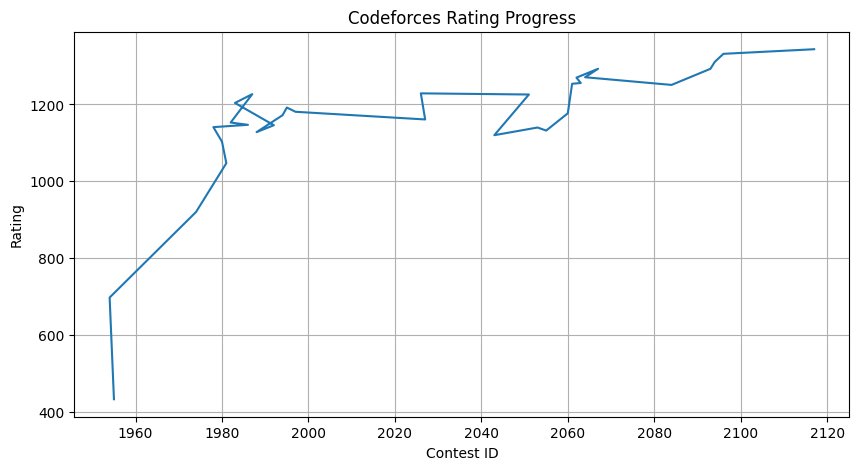

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("ratings.csv")

plt.figure(figsize=(10,5))
plt.plot(df["contestId"], df["newRating"])
plt.xlabel("Contest ID")
plt.ylabel("Rating")
plt.title("Codeforces Rating Progress")
plt.grid()
plt.show()
